<a href="https://colab.research.google.com/github/collinsmarra/prediction-sstuff/blob/main/backup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [34]:
class GenerateData:
    
    def months(self):
        high = 12
        low = 1
        df = pd.DataFrame(np.random.randint(low, high, size=(100, 1)), columns=["Month"])
        df.to_csv("months.csv", index=False)
        return True
    
    def rooms(self):
        high = 5
        low = 1
        df = pd.DataFrame(np.random.randint(low, high, size=(100, 1)), columns=["Rooms"])
        df.to_csv("rooms.csv", index=False)
        return True
    
    def location(self):
        ddd = {"Nairobi":1, "Mombasa":2, "Eldoret":3, "Nakuru":4, "Kisumu":5}
        df = pd.DataFrame(np.random.choice(list(ddd.values()),size=100),columns=['Location'])
        df.to_csv("location.csv", index=False)
        return True
    
    def security(self):
        ccc = [1, 0]
        df = pd.DataFrame(np.random.choice(ccc, size=100),columns=['Security'])
        df.to_csv("security.csv", index=False)
        return True
    """
    def price(self):
        price = [5000, 6000, 7000, 8000,9000, 10000]
        df = pd.DataFrame(np.random.choice(price, size=1000),columns=['Price'])
        df.to_csv("price.csv", index=False)
        return True"""

In [29]:
gg = GenerateData()
gg.months()
gg.rooms()
gg.location()
gg.security()
#gg.price()

True

In [27]:
months = pd.read_csv("months.csv")
rooms = pd.read_csv("rooms.csv")
location = pd.read_csv("location.csv")
security = pd.read_csv("security.csv")
price = pd.read_csv("price.csv")

dfmonths = pd.DataFrame(months)
dfrooms = pd.DataFrame(rooms)
dflocation = pd.DataFrame(location)
dfsecurity = pd.DataFrame(security)
dfprice = pd.DataFrame(price)

concat = pd.concat([dfmonths, dfrooms, dflocation, dfsecurity, dfprice], axis=1).reindex(dfmonths.index)
concat.to_csv("price_train.csv", index=False)
print(True)


True


In [30]:
months = pd.read_csv("months.csv")
rooms = pd.read_csv("rooms.csv")
location = pd.read_csv("location.csv")
security = pd.read_csv("security.csv")
#price = pd.read_csv("price.csv")

dfmonths = pd.DataFrame(months)
dfrooms = pd.DataFrame(rooms)
dflocation = pd.DataFrame(location)
dfsecurity = pd.DataFrame(security)
#dfprice = pd.DataFrame(price)

concat = pd.concat([dfmonths, dfrooms, dflocation, dfsecurity], axis=1).reindex(dfmonths.index)
concat.to_csv("price_test.csv", index=False)
print(True)


True


In [40]:
class Train:
    def __init__(self, train, test, output):
        self.train = train
        self.test = test
        self.output = output
    
    def trainer(self):
        data = pd.read_csv(self.train)
        array = data.values
        df = pd.DataFrame(array)
        maindf = df[[0,1,2,3]]
        mainarray = maindf.values
        tempdf = df[4]
        
        train_y = tempdf.values
        for i in range(len(train_y)):
            train_y[i] = str(train_y[i])
        self.learn = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg',max_iter=1000)
        self.learn.fit(mainarray, train_y)
        print(self.learn.fit(mainarray, train_y))
        print("Train \n \t200 OK")
  
    def tester(self):
        testdata = pd.read_csv(self.test)
        tester_array = testdata.values
        dft = pd.DataFrame(tester_array)
        testdf = dft[[0,1,2,3]]
        maintestarray = testdf.values
        self.x_predict = self.learn.predict(maintestarray)
        for i in range(len(self.x_predict)):
            self.x_predict[i] = str(self.x_predict[i])
        print("Test \n \t200 OK")
    
    def back_to_df(self):
        self.bdf = pd.DataFrame(self.x_predict, columns=['Predicted price'])
        self.bdf.index = self.bdf.index
        self.bdf.to_csv(self.output, index=False)
    def combine_data(self):
        main = pd.read_csv(self.test)
        dataframe = pd.DataFrame(main)
        dataframe2 = self.bdf
        concat = pd.concat([dataframe,dataframe2], axis=1).reindex(dataframe.index)
        concat.to_csv(self.output, index=False)
        print(" \033[92m Done successfully")

In [32]:
data="/content/price_train.csv"
test ="/content/price_test.csv"
output = "output2.csv"

train = Train(data, test, output)
train.trainer()
train.tester()
train.back_to_df()
train.combine_data()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
Train 
 	200 OK
Test 
 	200 OK
  Done successfully


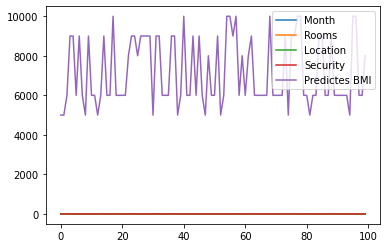

In [41]:
pppp = pd.read_csv("/content/output2.csv")
pppp.plot()
plt.show()

In [39]:
hggg = pd.read_csv("/content/output2.csv")
hggg.describe()

,Month,Rooms,Location,Security,Predictes BMI
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,6.340000,2.440000,2.930000,0.43000,7190.00000
std,3.002423,1.157496,1.335264,0.49757,1703.79849
min,1.000000,1.000000,1.000000,0.00000,5000.00000
25%,4.000000,1.000000,2.000000,0.00000,6000.00000
50%,7.000000,2.500000,3.000000,0.00000,6000.00000
75%,9.000000,3.000000,4.000000,1.00000,9000.00000
max,11.000000,4.000000,5.000000,1.00000,10000.00000
